In [1]:
import pandas as pd
from pprint import pprint

In [2]:
adm_df = pd.read_csv('data/admissions_journal_df.csv')
adm_df.rename(columns={'text': 'adm_text'}, inplace=True)

In [3]:
adm_df['discharge_location'].value_counts()


discharge_location
HOME                            7186
HOME HEALTH CARE                3499
SKILLED NURSING FACILITY        1922
REHAB                            501
DIED                             412
CHRONIC/LONG TERM ACUTE CARE     330
HOSPICE                          149
AGAINST ADVICE                   141
PSYCH FACILITY                   101
ACUTE HOSPITAL                    74
OTHER FACILITY                    54
ASSISTED LIVING                   29
HEALTHCARE FACILITY                4
Name: count, dtype: int64

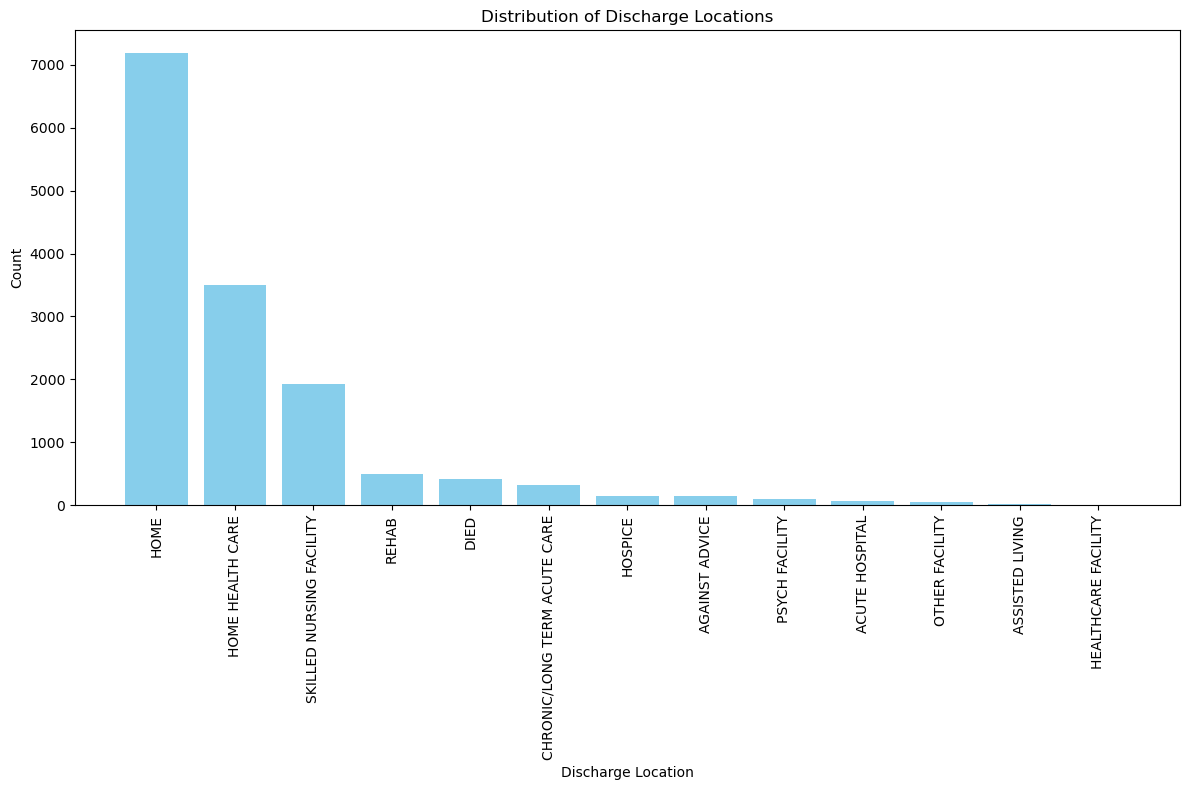

In [4]:
import matplotlib.pyplot as plt

# Data
discharge_counts = {
    'HOME': 7186,
    'HOME HEALTH CARE': 3499,
    'SKILLED NURSING FACILITY': 1922,
    'REHAB': 501,
    'DIED': 412,
    'CHRONIC/LONG TERM ACUTE CARE': 330,
    'HOSPICE': 149,
    'AGAINST ADVICE': 141,
    'PSYCH FACILITY': 101,
    'ACUTE HOSPITAL': 74,
    'OTHER FACILITY': 54,
    'ASSISTED LIVING': 29,
    'HEALTHCARE FACILITY': 4
}

# Plot
plt.figure(figsize=(12, 8))
plt.bar(discharge_counts.keys(), discharge_counts.values(), color='skyblue')
plt.xlabel('Discharge Location')
plt.ylabel('Count')
plt.title('Distribution of Discharge Locations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


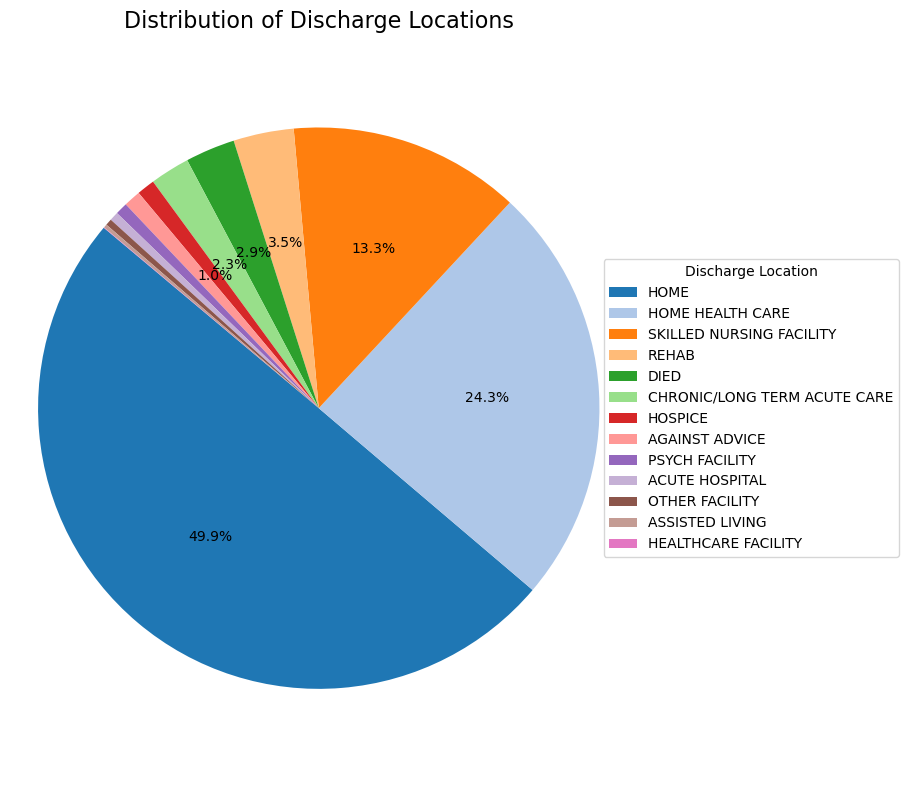

In [29]:
import matplotlib.pyplot as plt

# Data
discharge_counts = {
    'HOME': 7186,
    'HOME HEALTH CARE': 3499,
    'SKILLED NURSING FACILITY': 1922,
    'REHAB': 501,
    'DIED': 412,
    'CHRONIC/LONG TERM ACUTE CARE': 330,
    'HOSPICE': 149,
    'AGAINST ADVICE': 141,
    'PSYCH FACILITY': 101,
    'ACUTE HOSPITAL': 74,
    'OTHER FACILITY': 54,
    'ASSISTED LIVING': 29,
    'HEALTHCARE FACILITY': 4
}

# Function to format the percentage
def autopct_func(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create pie chart
wedges, texts, autotexts = ax.pie(discharge_counts.values(), 
                                   autopct=autopct_func, 
                                   startangle=140, 
                                   colors=plt.cm.tab20.colors)

# Create legend
ax.legend(wedges, discharge_counts.keys(), title="Discharge Location", loc="center left", bbox_to_anchor=(0.95, 0.5))

# Adjust the pie chart size to match the legend height
bbox = ax.get_position()
ax.set_position([bbox.x0, bbox.y0, bbox.width * 0.8, bbox.height])

plt.title('Distribution of Discharge Locations', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


In [5]:

# Define the mapping
severity_mapping_3 = {
    'HOME': 'Minimal Care/Recovery at Home',
    'HOME HEALTH CARE': 'Minimal Care/Recovery at Home',
    'AGAINST ADVICE': 'Minimal Care/Recovery at Home',
    'OTHER FACILITY': 'Minimal Care/Recovery at Home',
    'ASSISTED LIVING': 'Minimal Care/Recovery at Home',
    'HEALTHCARE FACILITY': 'Minimal Care/Recovery at Home',
    'SKILLED NURSING FACILITY': 'Moderate Care/Support Required',
    'REHAB': 'Moderate Care/Support Required',
    'CHRONIC/LONG TERM ACUTE CARE': 'Moderate Care/Support Required',
    'PSYCH FACILITY': 'Moderate Care/Support Required',
    'DIED': 'Severe Outcome',
    'HOSPICE': 'Severe Outcome',
    'ACUTE HOSPITAL': 'Severe Outcome'
}

# Create the new column based on the mapping
adm_df['severity_level'] = adm_df['discharge_location'].map(severity_mapping_3)
adm_df

,subject_id,hadm_id,admittime,discharge_location,adm_text,severity_level
0,10000032,22595853,2180-05-06 22:23:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home
1,10000032,22841357,2180-06-26 18:27:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home
2,10000032,25742920,2180-08-05 23:44:00,HOSPICE,"Subject ID: 10000032, Hospital Admission ID: 2...",Severe Outcome
3,10000032,29079034,2180-07-23 12:35:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home
4,10000068,25022803,2160-03-03 23:16:00,NaN,"Subject ID: 10000068, Hospital Admission ID: 2...",NaN
...,...,...,...,...,...,...
19995,10486120,21496368,2113-11-02 01:11:00,OTHER FACILITY,"Subject ID: 10486120, Hospital Admission ID: 2...",Minimal Care/Recovery at Home
19996,10486130,25382870,2148-09-16 20:12:00,HOME,"Subject ID: 10486130, Hospital Admission ID: 2...",Minimal Care/Recovery at Home
19997,10486144,20471114,2125-05-13 20:30:00,SKILLED NURSING FACILITY,"Subject ID: 10486144, Hospital Admission ID: 2...",Moderate Care/Support Required
19998,10486144,21214054,2124-04-04 14:31:00,HOME,"Subject ID: 10486144, Hospital Admission ID: 2...",Minimal Care/Recovery at Home


In [6]:
disc_df = pd.read_csv('data/discharge_journal_df.csv')
disc_df.rename(columns={'charttime': 'disc_charttime', 'text': 'disc_text'}, inplace=True)


In [7]:
# Merge the two dataframes on 'subject_id' and 'hadm_id'
merged_df = pd.merge(adm_df, disc_df, on=['subject_id', 'hadm_id'], how='inner')
merged_df = merged_df.dropna(subset=['discharge_location', 'adm_text', 'disc_text'])
merged_df

,subject_id,hadm_id,admittime,discharge_location,adm_text,severity_level,note_id,disc_charttime,disc_text
0,10000032,22595853,2180-05-06 22:23:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000032-DS-21,2180-05-07,"Subject ID: 10000032, HAdm ID: 22595853, Chart..."
1,10000032,22841357,2180-06-26 18:27:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000032-DS-22,2180-06-27,"Subject ID: 10000032, HAdm ID: 22841357, Chart..."
2,10000032,25742920,2180-08-05 23:44:00,HOSPICE,"Subject ID: 10000032, Hospital Admission ID: 2...",Severe Outcome,10000032-DS-24,2180-08-07,"Subject ID: 10000032, HAdm ID: 25742920, Chart..."
3,10000032,29079034,2180-07-23 12:35:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000032-DS-23,2180-07-25,"Subject ID: 10000032, HAdm ID: 29079034, Chart..."
4,10000084,23052089,2160-11-21 01:56:00,HOME HEALTH CARE,"Subject ID: 10000084, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000084-DS-17,2160-11-25,"Subject ID: 10000084, HAdm ID: 23052089, Chart..."
...,...,...,...,...,...,...,...,...,...
15223,10486120,21496368,2113-11-02 01:11:00,OTHER FACILITY,"Subject ID: 10486120, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10486120-DS-3,2113-11-03,"Subject ID: 10486120, HAdm ID: 21496368, Chart..."
15224,10486130,25382870,2148-09-16 20:12:00,HOME,"Subject ID: 10486130, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10486130-DS-15,2148-09-18,"Subject ID: 10486130, HAdm ID: 25382870, Chart..."
15225,10486144,20471114,2125-05-13 20:30:00,SKILLED NURSING FACILITY,"Subject ID: 10486144, Hospital Admission ID: 2...",Moderate Care/Support Required,10486144-DS-27,2125-05-19,"Subject ID: 10486144, HAdm ID: 20471114, Chart..."
15226,10486144,21214054,2124-04-04 14:31:00,HOME,"Subject ID: 10486144, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10486144-DS-25,2124-04-06,"Subject ID: 10486144, HAdm ID: 21214054, Chart..."


In [8]:
merged_df

,subject_id,hadm_id,admittime,discharge_location,adm_text,severity_level,note_id,disc_charttime,disc_text
0,10000032,22595853,2180-05-06 22:23:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000032-DS-21,2180-05-07,"Subject ID: 10000032, HAdm ID: 22595853, Chart..."
1,10000032,22841357,2180-06-26 18:27:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000032-DS-22,2180-06-27,"Subject ID: 10000032, HAdm ID: 22841357, Chart..."
2,10000032,25742920,2180-08-05 23:44:00,HOSPICE,"Subject ID: 10000032, Hospital Admission ID: 2...",Severe Outcome,10000032-DS-24,2180-08-07,"Subject ID: 10000032, HAdm ID: 25742920, Chart..."
3,10000032,29079034,2180-07-23 12:35:00,HOME,"Subject ID: 10000032, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000032-DS-23,2180-07-25,"Subject ID: 10000032, HAdm ID: 29079034, Chart..."
4,10000084,23052089,2160-11-21 01:56:00,HOME HEALTH CARE,"Subject ID: 10000084, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10000084-DS-17,2160-11-25,"Subject ID: 10000084, HAdm ID: 23052089, Chart..."
...,...,...,...,...,...,...,...,...,...
15223,10486120,21496368,2113-11-02 01:11:00,OTHER FACILITY,"Subject ID: 10486120, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10486120-DS-3,2113-11-03,"Subject ID: 10486120, HAdm ID: 21496368, Chart..."
15224,10486130,25382870,2148-09-16 20:12:00,HOME,"Subject ID: 10486130, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10486130-DS-15,2148-09-18,"Subject ID: 10486130, HAdm ID: 25382870, Chart..."
15225,10486144,20471114,2125-05-13 20:30:00,SKILLED NURSING FACILITY,"Subject ID: 10486144, Hospital Admission ID: 2...",Moderate Care/Support Required,10486144-DS-27,2125-05-19,"Subject ID: 10486144, HAdm ID: 20471114, Chart..."
15226,10486144,21214054,2124-04-04 14:31:00,HOME,"Subject ID: 10486144, Hospital Admission ID: 2...",Minimal Care/Recovery at Home,10486144-DS-25,2124-04-06,"Subject ID: 10486144, HAdm ID: 21214054, Chart..."


In [9]:
pprint(merged_df.iloc[0].disc_text)

('Subject ID: 10000032, HAdm ID: 22595853, Chart Time: 2180-05-07 00:00:00\n'
 '\n'
 ' \n'
 'Name:  ___                     Unit No:   ___\n'
 ' \n'
 'Admission Date:  ___              Discharge Date:   ___\n'
 ' \n'
 'Date of Birth:  ___             Sex:   F\n'
 ' \n'
 'Service: MEDICINE\n'
 ' \n'
 'Allergies: \n'
 'No Known Allergies / Adverse Drug Reactions\n'
 ' \n'
 'Attending: ___\n'
 ' \n'
 'Chief Complaint:\n'
 'Worsening ABD distension and pain \n'
 ' \n'
 'Major Surgical or Invasive Procedure:\n'
 'Paracentesis\n'
 '\n'
 ' \n'
 'History of Present Illness:\n'
 '___ HCV cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, \n'
 'bioplar, PTSD, presented from OSH ED with worsening abd \n'
 'distension over past week.  \n'
 'Pt reports self-discontinuing lasix and spirnolactone ___ weeks \n'
 'ago, because she feels like "they don\'t do anything" and that \n'
 'she "doesn\'t want to put more chemicals in her." She does not \n'
 'follow Na-restricted diets. In the past week, she not

In [10]:
pprint(merged_df.iloc[0].adm_text)

('Subject ID: 10000032, Hospital Admission ID: 22595853, Admission Time: '
 '2180-05-06 22:23:00\n'
 'Admission Type: URGENT, Admission Location: TRANSFER FROM HOSPITAL, '
 'Insurance: Other, Language: ENGLISH, Marital Status: WIDOWED, Race: WHITE, '
 'Gender: F, Age: 52')


In [11]:
import re
import pandas as pd

# Load the merged dataframe (assume it's already merged and cleaned)
# merged_df = ...

# Define the sections to extract
sections_to_use = [
    'Chief Complaint', 'Major Surgical or Invasive Procedure', 'History of Present Illness',
    'Past Medical History', 'Social History', 'Physical Exam', 'Brief Hospital Course', 'Medications on Admission'
]

# Function to parse discharge notes into sections
def parse_discharge_notes(text):
    sections = [
        'Chief Complaint:', 'Major Surgical or Invasive Procedure:', 'History of Present Illness:',
        'Past Medical History:', 'Social History:', 'Physical Exam:', 'Brief Hospital Course:',
        'Medications on Admission:', 'Discharge Medications:', 'Discharge Disposition:',
        'Discharge Diagnosis:', 'Discharge Condition:', 'Discharge Instructions:', 'Followup Instructions:'
    ]
    
    section_pattern = '|'.join([re.escape(section) for section in sections])
    split_text = re.split(f'({section_pattern})', text)

    # Initialize all sections with empty strings
    parsed_sections = {section.strip(':'): "" for section in sections}
    current_section = None

    for part in split_text:
        part = part.strip()
        if part in sections:
            current_section = part.strip(':')
        elif current_section:
            parsed_sections[current_section] += " " + part

    # Strip extra spaces from each section text
    for key in parsed_sections:
        parsed_sections[key] = parsed_sections[key].strip()

    return parsed_sections

# Apply the function to the disc_text column
parsed_notes = merged_df['disc_text'].apply(parse_discharge_notes)

# Convert parsed sections into separate columns
parsed_df = pd.DataFrame(parsed_notes.tolist())

# Reset index for both dataframes to ensure alignment
merged_df.reset_index(drop=True, inplace=True)
parsed_df.reset_index(drop=True, inplace=True)

# Merge with the original dataframe
result_df = pd.concat([merged_df, parsed_df], axis=1)

# Extract only the necessary sections and admission text for training
result_df['training_text'] = result_df.apply(
    lambda row: " ".join([row['adm_text']] + [row[section] if pd.notna(row[section]) else '' for section in sections_to_use]),
    axis=1
)

# Select the columns needed for training
training_df = result_df[['training_text', 'discharge_location', 'severity_level']]

training_df


,training_text,discharge_location,severity_level
0,"Subject ID: 10000032, Hospital Admission ID: 2...",HOME,Minimal Care/Recovery at Home
1,"Subject ID: 10000032, Hospital Admission ID: 2...",HOME,Minimal Care/Recovery at Home
2,"Subject ID: 10000032, Hospital Admission ID: 2...",HOSPICE,Severe Outcome
3,"Subject ID: 10000032, Hospital Admission ID: 2...",HOME,Minimal Care/Recovery at Home
4,"Subject ID: 10000084, Hospital Admission ID: 2...",HOME HEALTH CARE,Minimal Care/Recovery at Home
...,...,...,...
12772,"Subject ID: 10486120, Hospital Admission ID: 2...",OTHER FACILITY,Minimal Care/Recovery at Home
12773,"Subject ID: 10486130, Hospital Admission ID: 2...",HOME,Minimal Care/Recovery at Home
12774,"Subject ID: 10486144, Hospital Admission ID: 2...",SKILLED NURSING FACILITY,Moderate Care/Support Required
12775,"Subject ID: 10486144, Hospital Admission ID: 2...",HOME,Minimal Care/Recovery at Home


In [15]:
result_df.to_csv('data/training_text.csv', index=False)

In [12]:
training_df.to_csv('data/training_text.csv', index=False)

In [13]:
parsed_df.shape

(12777, 14)

In [104]:
result_df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'discharge_location', 'adm_text',
       'severity_level', 'note_id', 'disc_charttime', 'disc_text',
       'Chief Complaint', 'Major Surgical or Invasive Procedure',
       'History of Present Illness', 'Past Medical History', 'Social History',
       'Physical Exam', 'Brief Hospital Course', 'Medications on Admission',
       'Discharge Medications', 'Discharge Disposition', 'Discharge Diagnosis',
       'Discharge Condition', 'Discharge Instructions'],
      dtype='object')

In [105]:
parsed_df['Discharge Disposition'].value_counts()

Discharge Disposition
Home                                                                                                                                                                                                                                                                                                                             5954
Home With Service\n \nFacility:\n___                                                                                                                                                                                                                                                                                             3053
Extended Care\n \nFacility:\n___                                                                                                                                                                                                                                                                                                 2417


In [106]:
result_df.to_csv('data/parsed_adm_disc_df.csv', index=False)

In [16]:
result_df.columns

Index(['subject_id', 'hadm_id', 'admittime', 'discharge_location', 'adm_text',
       'severity_level', 'note_id', 'disc_charttime', 'disc_text',
       'Chief Complaint', 'Major Surgical or Invasive Procedure',
       'History of Present Illness', 'Past Medical History', 'Social History',
       'Physical Exam', 'Brief Hospital Course', 'Medications on Admission',
       'Discharge Medications', 'Discharge Disposition', 'Discharge Diagnosis',
       'Discharge Condition', 'Discharge Instructions',
       'Followup Instructions', 'training_text'],
      dtype='object')

In [21]:
result_df['Physical Exam'].iloc[0].split('\n')

['VS: 98.1 107/61 78 18 97RA  ',
 'General: in NAD  ',
 'HEENT: CTAB, anicteric sclera, OP clear  ',
 'Neck: supple, no LAD  ',
 'CV: RRR,S1S2, no m/r/g  ',
 'Lungs: CTAb, prolonged expiratory phase, no w/r/r  ',
 'Abdomen: distended, mild diffuse tenderness, +flank dullness, ',
 'cannot percuss liver/spleen edge ___ distension  ',
 'GU: no foley  ',
 'Ext: wwp, no c/e/e, + clubbing  ',
 'Neuro: AAO3, converse normally, able to recall 3 times after 5 ',
 'minutes, CN II-XII intact  ',
 '',
 'Discharge:',
 '',
 'PHYSICAL EXAMINATION:  ',
 'VS: 98 105/70 95',
 'General: in NAD  ',
 'HEENT: anicteric sclera, OP clear  ',
 'Neck: supple, no LAD  ',
 'CV: RRR,S1S2, no m/r/g  ',
 'Lungs: CTAb, prolonged expiratory phase, no w/r/r  ',
 'Abdomen: distended but improved, TTP in RUQ, ',
 'GU: no foley  ',
 'Ext: wwp, no c/e/e, + clubbing  ',
 'Neuro: AAO3,  CN II-XII intact  ',
 '',
 ' ',
 'Pertinent Results:',
 '___ 10:25PM   GLUCOSE-109* UREA N-25* CREAT-0.3* SODIUM-138 ',
 'POTASSIUM-3.4 CHLO

In [20]:
result_df.iloc[0]

subject_id                                                                       10000032
hadm_id                                                                          22595853
admittime                                                             2180-05-06 22:23:00
discharge_location                                                                   HOME
adm_text                                Subject ID: 10000032, Hospital Admission ID: 2...
severity_level                                              Minimal Care/Recovery at Home
note_id                                                                    10000032-DS-21
disc_charttime                                                                 2180-05-07
disc_text                               Subject ID: 10000032, HAdm ID: 22595853, Chart...
Chief Complaint                                         Worsening ABD distension and pain
Major Surgical or Invasive Procedure                                         Paracentesis
History of

In [101]:
sections_to_use = [
    'Chief Complaint', 'Major Surgical or Invasive Procedure', 'History of Present Illness',
    'Past Medical History', 'Social History', 'Physical Exam', 'Brief Hospital Course', 'Medications on Admission'
]

# Extract only the necessary sections and admission text for training
result_df['training_text'] = result_df.apply(
    lambda row: " ".join([row['adm_text']] + [row[section] if pd.notna(row[section]) else '' for section in sections_to_use]),
    axis=1
)

# Select the columns needed for training
training_df = result_df[['training_text', 'discharge_location', 'severity_level']]


TypeError: sequence item 0: expected str instance, float found

In [ ]:
result_df['adm_text'].isna().sum()

337

In [3]:
import pandas as pd

training_df = pd.read_csv('data/training_text.csv')
training_df['training_text']

0        Subject ID: 10000032, Hospital Admission ID: 2...
1        Subject ID: 10000032, Hospital Admission ID: 2...
2        Subject ID: 10000032, Hospital Admission ID: 2...
3        Subject ID: 10000032, Hospital Admission ID: 2...
4        Subject ID: 10000084, Hospital Admission ID: 2...
                               ...                        
12772    Subject ID: 10486120, Hospital Admission ID: 2...
12773    Subject ID: 10486130, Hospital Admission ID: 2...
12774    Subject ID: 10486144, Hospital Admission ID: 2...
12775    Subject ID: 10486144, Hospital Admission ID: 2...
12776    Subject ID: 10486144, Hospital Admission ID: 2...
Name: training_text, Length: 12777, dtype: object

In [8]:
training_df.columns


Index(['subject_id', 'hadm_id', 'admittime', 'discharge_location', 'adm_text',
       'severity_level', 'note_id', 'disc_charttime', 'disc_text',
       'Chief Complaint', 'Major Surgical or Invasive Procedure',
       'History of Present Illness', 'Past Medical History', 'Social History',
       'Physical Exam', 'Brief Hospital Course', 'Medications on Admission',
       'Discharge Medications', 'Discharge Disposition', 'Discharge Diagnosis',
       'Discharge Condition', 'Discharge Instructions',
       'Followup Instructions', 'training_text'],
      dtype='object')

In [5]:
from pprint import pprint 
pprint(training_df['training_text'].iloc[0])

('Subject ID: 10000032, Hospital Admission ID: 22595853, Admission Time: '
 '2180-05-06 22:23:00\n'
 'Admission Type: URGENT, Admission Location: TRANSFER FROM HOSPITAL, '
 'Insurance: Other, Language: ENGLISH, Marital Status: WIDOWED, Race: WHITE, '
 'Gender: F, Age: 52 Worsening ABD distension and pain Paracentesis ___ HCV '
 'cirrhosis c/b ascites, hiv on ART, h/o IVDU, COPD, \n'
 'bioplar, PTSD, presented from OSH ED with worsening abd \n'
 'distension over past week.  \n'
 'Pt reports self-discontinuing lasix and spirnolactone ___ weeks \n'
 'ago, because she feels like "they don\'t do anything" and that \n'
 'she "doesn\'t want to put more chemicals in her." She does not \n'
 'follow Na-restricted diets. In the past week, she notes that she \n'
 'has been having worsening abd distension and discomfort. She \n'
 'denies ___ edema, or SOB, or orthopnea. She denies f/c/n/v, d/c, \n'
 'dysuria. She had food poisoning a week ago from eating stale \n'
 'cake (n/v 20 min after food inge

In [11]:
training_df.columns


Index(['subject_id', 'hadm_id', 'admittime', 'discharge_location', 'adm_text',
       'severity_level', 'note_id', 'disc_charttime', 'disc_text',
       'Chief Complaint', 'Major Surgical or Invasive Procedure',
       'History of Present Illness', 'Past Medical History', 'Social History',
       'Physical Exam', 'Brief Hospital Course', 'Medications on Admission',
       'Discharge Medications', 'Discharge Disposition', 'Discharge Diagnosis',
       'Discharge Condition', 'Discharge Instructions',
       'Followup Instructions', 'training_text'],
      dtype='object')

In [28]:
from PIL import Image, ImageDraw, ImageFont

# Assuming you have the text variable defined
text = training_df['training_text'].iloc[0]

# Sections to use (in light green)
sections_to_use = [
    'Chief Complaint', 'Major Surgical or Invasive Procedure', 'History of Present Illness',
    'Past Medical History', 'Social History', 'Physical Exam', 'Brief Hospital Course', 'Medications on Admission'
]

# Masked sections (in light red)
masked_sections = [
    'Discharge Medications', 'Discharge Disposition', 'Discharge Diagnosis',
    'Discharge Condition', 'Discharge Instructions', 'Followup Instructions'
]

# Create the formatted text
formatted_text = ""
for section in sections_to_use:
    if section in training_df.columns:
        formatted_text += f"{section}:\n{training_df[section].iloc[0]}\n\n"

for section in masked_sections:
    if section in training_df.columns:
        formatted_text += f"{section}:\n{training_df[section].iloc[0]}\n\n"

# Create a new image with white background and higher resolution
image_width = 850
image_height = 3100
dpi = 300

image = Image.new('RGB', (image_width, image_height), 'white')
draw = ImageDraw.Draw(image)

# Use the default Pillow font
font_size = 16
font = ImageFont.load_default()

# Split text into lines
lines = formatted_text.split('\n')

# Variables to manage text positioning
y = 10
line_height = font_size

for line in lines:
    highlight_color = None
    for section in sections_to_use:
        if line.startswith(section):
            highlight_color = 'lightgreen'
            break
    for masked_section in masked_sections:
        if line.startswith(masked_section):
            highlight_color = 'lightcoral'
            break

    if highlight_color:
        draw.rectangle([10, y, image_width - 10, y + line_height], fill=highlight_color)

    draw.text((15, y), line, fill='black', font=font)
    y += line_height

# Resize for higher resolution
high_res_image = image.resize((image_width * 2, image_height * 2), Image.LANCZOS)
high_res_image.save('clinical_note_high_res.png', dpi=(dpi, dpi))
high_res_image.show()
